### HW 7 Assignment 1

In [295]:
import urllib
import pandas as pd
import geopandas
import os
%matplotlib inline
from matplotlib import *
import sys
import pylab as pl
import requests
import json
import numpy as np
import io
from fiona.crs import from_epsg 
import shapely
import geopandas as gpd
from datetime import datetime
from datetime import timedelta

In [28]:
#create the env variable since previous doesn't work
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [51]:
def PUMA():
    print ("Downloading")
    if not os.path.isfile(os.getenv("PUIDATA") + "/puma.zip"):
        print ("no zip in puidata")
        if not os.path.isfile("puma.zip"):
            print ("no zip in current folder")
            urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile', "puma.zip")                  

    os.system("mv puma.zip " + os.getenv("PUIDATA"))
    print ("moving zipped file")
    
    ### unzip the csv 
    os.system("unzip "+ os.getenv("PUIDATA") + "/puma.zip -d " + os.getenv("PUIDATA"))
    print ("unzipped file")

#     #move individual files out of pluto for web, for easier access
#     for x in boroughs:
#         os.system("mv " + os.getenv("PUIDATA")+ "/PLUTO_for_WEB/" + x + "_18v1.csv " + os.getenv("PUIDATA"))
#         ### One final check:
#         if not os.path.isfile(os.getenv("PUIDATA") + "/" + x + "_18v1.csv"):
#             print ("WARNING!!! something is wrong: the %s file is not there!" % (x))

#         else:
#             print ("file in place, you can continue")

In [52]:
PUMA()

Downloading
no zip in puidata
no zip in current folder
moving zipped file
unzipped file


In [ ]:
#consider the fact that the string changes everytime....

In [58]:
# shapefiles = ['dbf', 'prj', 'shp', 'shx']

In [59]:
# shapedict = {}

In [60]:
# for x in shapefiles:
#     shapedict[x] = geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA")\
#                                                     + '/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.' + x)

FionaValueError: No dataset found at path '/nfshome/sjf374/PUI2018/PUIdata/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.prj' using drivers: *

In [63]:
shape = geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA")\
                        + '/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.shp')

In [64]:
shape.head()

puma    shape_area     shape_leng  \
0  3701  9.792852e+07   53227.144461   
1  3702  1.889860e+08  106050.002302   
2  3703  2.670137e+08  304071.257466   
3  3704  1.062129e+08   47970.901277   
4  4015  8.105438e+07   50007.415493   

                                            geometry  
0  POLYGON ((-73.89641133483133 40.90450452082026...  
1  POLYGON ((-73.8442314689986 40.86942035096838,...  
2  (POLYGON ((-73.78833349834532 40.8346671297593...  
3  POLYGON ((-73.84792614069238 40.8713422330779,...  
4  POLYGON ((-73.95374853778468 40.63858633758547...

In [66]:
shape.crs

{'init': 'epsg:4326'}

In [ ]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
# cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

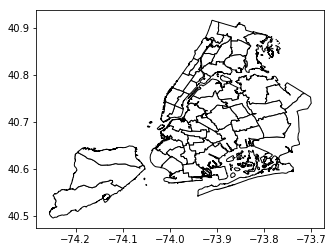

In [74]:
shape.plot(color="white", edgecolor="black")

In [ ]:
## ADD CAPTION

In [75]:
os.system("unzip "+ os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.US05PR.zip -d " + os.getenv("PUIDATA"))

0

In [81]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [84]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))

In [86]:
aff1y

{'variables': {'B23009_020E': {'attributes': 'B23009_020M,B23009_020EA',
   'concept': 'PRESENCE OF OWN CHILDREN UNDER 18 YEARS BY FAMILY TYPE BY NUMBER OF WORKERS IN FAMILY IN THE PAST 12 MONTHS',
   'group': 'B23009',
   'label': 'Estimate!!Total!!With own children of the householder under 18 years!!Other family!!Female householder, no husband present!!1 worker',
   'limit': 0,
   'predicateType': 'int'},
  'B23002D_079E': {'attributes': 'B23002D_079M,B23002D_079EA',
   'concept': 'SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (ASIAN ALONE)',
   'group': 'B23002D',
   'label': 'Estimate!!Total!!Female!!70 years and over!!Not in labor force',
   'limit': 0,
   'predicateType': 'int'},
  'B14002_048E': {'attributes': 'B14002_048M,B14002_048EA',
   'concept': 'SEX BY SCHOOL ENROLLMENT BY LEVEL OF SCHOOL BY TYPE OF SCHOOL FOR THE POPULATION 3 YEARS AND OVER',
   'group': 'B14002',
   'label': 'Estimate!!Total!!Female!!Enrolled in school!!Enrolled in graduate or pro

In [87]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL')]

In [94]:
#keyword for the number of households
##WHY DIDNT this one GET PULLED 
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [95]:
#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [99]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

B28002_004E                                               NAME  state  \
0        32607                 St. Lawrence County PUMA, New York     36   
1        50811  Clinton, Franklin, Essex & Hamilton Counties P...     36   
2        41210        Warren & Washington Counties PUMA, New York     36   
3        36075  Herkimer (North & Central) & Oneida (Outer) Co...     36   
4        47786  Oneida County (Central)--Greater Utica & Rome ...     36   

   public use microdata area  Unnamed: 4  
0                        100         NaN  
1                        200         NaN  
2                        300         NaN  
3                        401         NaN  
4                        402         NaN

In [100]:
#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))


pumaPP.head()

B28002_001E                                               NAME  state  \
0        40479                 St. Lawrence County PUMA, New York     36   
1        67092  Clinton, Franklin, Essex & Hamilton Counties P...     36   
2        51614        Warren & Washington Counties PUMA, New York     36   
3        44300  Herkimer (North & Central) & Oneida (Outer) Co...     36   
4        61146  Oneida County (Central)--Greater Utica & Rome ...     36   

   public use microdata area  Unnamed: 4  
0                        100         NaN  
1                        200         NaN  
2                        300         NaN  
3                        401         NaN  
4                        402         NaN

In [108]:
pumaPP['public use microdata area'].nunique()

145

In [111]:
mergeddf = pd.merge(pumaPP, pumaBB, how='outer', on='public use microdata area')

In [112]:
mergeddf.head()

B28002_001E                                             NAME_x  state_x  \
0        40479                 St. Lawrence County PUMA, New York       36   
1        67092  Clinton, Franklin, Essex & Hamilton Counties P...       36   
2        51614        Warren & Washington Counties PUMA, New York       36   
3        44300  Herkimer (North & Central) & Oneida (Outer) Co...       36   
4        61146  Oneida County (Central)--Greater Utica & Rome ...       36   

   public use microdata area  Unnamed: 4_x  B28002_004E  \
0                        100           NaN        32607   
1                        200           NaN        50811   
2                        300           NaN        41210   
3                        401           NaN        36075   
4                        402           NaN        47786   

                                              NAME_y  state_y  Unnamed: 4_y  
0                 St. Lawrence County PUMA, New York       36           NaN  
1  Clinton, Franklin, Essex & Hamilton Counties P...       36           NaN  
2        Warren & Washington Counties PUMA, New York       36           NaN  
3  Herkimer (North & Central) & Oneida (Outer) Co...       36           NaN  
4  Oneida County (Central)--Greater Utica & Rome ...       36           NaN

In [116]:
mergeddf['pcBB'] = (mergeddf['B28002_004E'] / mergeddf['B28002_001E'])*100

In [117]:
mergeddf.head()

B28002_001E                                             NAME_x  state_x  \
0        40479                 St. Lawrence County PUMA, New York       36   
1        67092  Clinton, Franklin, Essex & Hamilton Counties P...       36   
2        51614        Warren & Washington Counties PUMA, New York       36   
3        44300  Herkimer (North & Central) & Oneida (Outer) Co...       36   
4        61146  Oneida County (Central)--Greater Utica & Rome ...       36   

   public use microdata area  Unnamed: 4_x  B28002_004E  \
0                        100           NaN        32607   
1                        200           NaN        50811   
2                        300           NaN        41210   
3                        401           NaN        36075   
4                        402           NaN        47786   

                                              NAME_y  state_y  Unnamed: 4_y  \
0                 St. Lawrence County PUMA, New York       36           NaN   
1  Clinton, Franklin, Essex & Hamilton Counties P...       36           NaN   
2        Warren & Washington Counties PUMA, New York       36           NaN   
3  Herkimer (North & Central) & Oneida (Outer) Co...       36           NaN   
4  Oneida County (Central)--Greater Utica & Rome ...       36           NaN   

        pcBB  
0  80.552879  
1  75.733321  
2  79.842678  
3  81.433409  
4  78.150656

In [119]:
os.system("unzip "+ os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50.zip -d " + os.getenv("PUIDATA"))


256

In [120]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])

bbpc.head()

GCT_STUB.target-geo-id2     HC01             HC02
0          Target Geo Id2  Percent  Margin of Error
1                      01     74.7              0.5
2                 0100100     70.9              2.5
3                 0100200     80.5              2.7
4                 0100301     87.0              2.8

In [131]:
bbpc = bbpc.rename(columns=bbpc.iloc[0]).loc[1:]

In [139]:
bbpc.head()

Target Geo Id2 Percent Margin of Error
1               1    74.7             0.5
2          100100    70.9             2.5
3          100200    80.5             2.7
4          100301    87.0             2.8
5          100302    81.9             2.9

In [138]:
bbpc['Target Geo Id2'] = bbpc['Target Geo Id2'].astype(int)

In [145]:
bbpc['gid'] = bbpc['Target Geo Id2'].astype(int) - 3600000
bbpc.head()

Target Geo Id2 Percent Margin of Error      gid
1               1    74.7             0.5 -3599999
2          100100    70.9             2.5 -3499900
3          100200    80.5             2.7 -3499800
4          100301    87.0             2.8 -3499699
5          100302    81.9             2.9 -3499698

In [149]:
diff_ = mergeddf.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "Percent"]]

diff_['Percent'] = diff_['Percent'].astype(float)
diff_["diff"] = np.abs(diff_["pcBB"] - diff_["Percent"])

diff_.describe()

pcBB     Percent        diff
count  145.000000  145.000000  145.000000
mean    81.845478   81.843448    0.026217
std      7.063369    7.065358    0.014480
min     54.932945   54.900000    0.000178
25%     77.770257   77.800000    0.012252
50%     82.826141   82.800000    0.027230
75%     87.305077   87.300000    0.039090
max     93.404143   93.400000    0.049872

In [150]:
shape.head()

puma    shape_area     shape_leng  \
0  3701  9.792852e+07   53227.144461   
1  3702  1.889860e+08  106050.002302   
2  3703  2.670137e+08  304071.257466   
3  3704  1.062129e+08   47970.901277   
4  4015  8.105438e+07   50007.415493   

                                            geometry  
0  POLYGON ((-73.89641133483133 40.90450452082026...  
1  POLYGON ((-73.8442314689986 40.86942035096838,...  
2  (POLYGON ((-73.78833349834532 40.8346671297593...  
3  POLYGON ((-73.84792614069238 40.8713422330779,...  
4  POLYGON ((-73.95374853778468 40.63858633758547...

In [151]:
bbpc.head()

Target Geo Id2 Percent Margin of Error      gid
1               1    74.7             0.5 -3599999
2          100100    70.9             2.5 -3499900
3          100200    80.5             2.7 -3499800
4          100301    87.0             2.8 -3499699
5          100302    81.9             2.9 -3499698

In [154]:
shape.dtypes

puma           object
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

In [ ]:
#does not work without making puma into an int

In [155]:
shape['puma'] = shape['puma'].astype(int)

In [157]:
pumashp = pd.merge(left=shape, right=bbpc, left_on='puma', right_on='gid')

In [158]:
pumashp.head()

puma    shape_area     shape_leng  \
0  3701  9.792852e+07   53227.144461   
1  3702  1.889860e+08  106050.002302   
2  3703  2.670137e+08  304071.257466   
3  3704  1.062129e+08   47970.901277   
4  4015  8.105438e+07   50007.415493   

                                            geometry  Target Geo Id2 Percent  \
0  POLYGON ((-73.89641133483133 40.90450452082026...         3603701    84.3   
1  POLYGON ((-73.8442314689986 40.86942035096838,...         3603702    68.3   
2  (POLYGON ((-73.78833349834532 40.8346671297593...         3603703    82.8   
3  POLYGON ((-73.84792614069238 40.8713422330779,...         3603704    72.6   
4  POLYGON ((-73.95374853778468 40.63858633758547...         3604015    78.8   

  Margin of Error   gid  
0             2.6  3701  
1             3.7  3702  
2             3.2  3703  
3             3.6  3704  
4             2.9  4015

In [163]:
pumashp.dtypes

puma                 int64
shape_area         float64
shape_leng         float64
geometry            object
Target Geo Id2       int64
Percent             object
Margin of Error     object
gid                  int64
dtype: object

In [ ]:
#lets make the percent a number or else it will register as categorical

In [164]:
pumashp['Percent'] = pumashp['Percent'].astype('float')

(-74.283370477424782,
 -73.672229948940085,
 40.47514452607718,
 40.936503646096469)

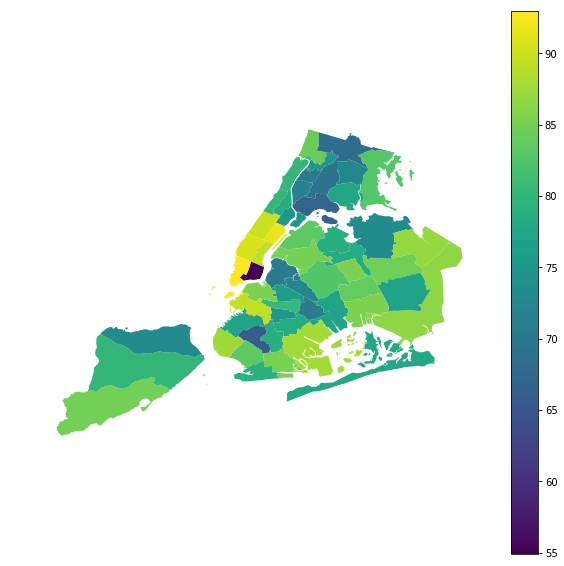

In [184]:
pumashp.plot(column='Percent', figsize=(10,10), legend=True).axis('off')

# 4. LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.

In [190]:
def getlinkNYC():
    '''
    gets link NYC data locations in csv form
    '''
    print ("Downloading")
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/linkNYClocations.csv"):
        if os.path.isfile('linkNYClocations.csv'):
            # if in the current dir just move it
            os.system("mv linkNYClocations.csv " + os.getenv("PUIDATA"))
        #otherwise download file
        else:
            os.system("curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW7_fb55/linkNYClocations.csv > linkNYClocations.csv")
            ###  To move it I use the os.system() functions to run bash commands with arguments
            os.system("mv  linkNYClocations.csv" + os.getenv("PUIDATA"))
    
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/linkNYClocations.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [193]:
linkNYCdf = pd.read_csv(os.getenv("PUIDATA") + "/linkNYClocations.csv")

In [194]:
linkNYCdf.head()

Unnamed: 0     link_site  longitude  date_link_   latitude
0           0  bk-01-138951 -73.942489  2017-07-01  40.701668
1           1  bk-01-109091 -73.942169  2017-07-01  40.701542
2           2  bk-01-143982 -73.942239  2017-07-01  40.701930
3           3  bk-01-109262 -73.942918  2017-04-28  40.705060
4           4  bk-01-125268 -73.953439  2017-03-31  40.728133

In [200]:
linkNYCdf = linkNYCdf.iloc[0:,1:]

In [201]:
linkNYCdf.head()

link_site  longitude  date_link_   latitude
0  bk-01-138951 -73.942489  2017-07-01  40.701668
1  bk-01-109091 -73.942169  2017-07-01  40.701542
2  bk-01-143982 -73.942239  2017-07-01  40.701930
3  bk-01-109262 -73.942918  2017-04-28  40.705060
4  bk-01-125268 -73.953439  2017-03-31  40.728133

In [202]:
linkNYCdf.shape

(1414, 4)

In [208]:
type(linkNYCdf)

pandas.core.frame.DataFrame

In [212]:
# combine lat and lon to one column
linkNYCdf['lonlat']=list(zip(linkNYCdf['longitude'],linkNYCdf['latitude']))
# Create Point Geometry for based on lonlat column
linkNYCdf['geometry']=linkNYCdf[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
linkNYCdf.head()

link_site  longitude  date_link_   latitude  \
0  bk-01-138951 -73.942489  2017-07-01  40.701668   
1  bk-01-109091 -73.942169  2017-07-01  40.701542   
2  bk-01-143982 -73.942239  2017-07-01  40.701930   
3  bk-01-109262 -73.942918  2017-04-28  40.705060   
4  bk-01-125268 -73.953439  2017-03-31  40.728133   

                            lonlat                                  geometry  
0      (-73.94248859, 40.70166753)          POINT (-73.94248859 40.70166753)  
1  (-73.9421692831, 40.7015421938)      POINT (-73.9421692831 40.7015421938)  
2  (-73.9422392385, 40.7019303439)  POINT (-73.94223923850001 40.7019303439)  
3      (-73.94291758, 40.70506042)          POINT (-73.94291758 40.70506042)  
4          (-73.953439, 40.728133)              POINT (-73.953439 40.728133)

In [273]:
linkNYCdf['date_link_'] = pd.to_datetime(linkNYCdf['date_link_'])

In [297]:
##linkNYCdf['timepassed'] = datetime.today(),linkNYCdf['date_link_'])

TypeError: unsupported type for timedelta seconds component: Series

In [288]:
linkNYCgdf = gpd.GeoDataFrame(linkNYCdf)

In [289]:
pumashp.crs = from_epsg(4326)
linkNYCgdf.crs = from_epsg(4326)
linkNYCgdf = linkNYCgdf.to_crs(pumashp.crs)

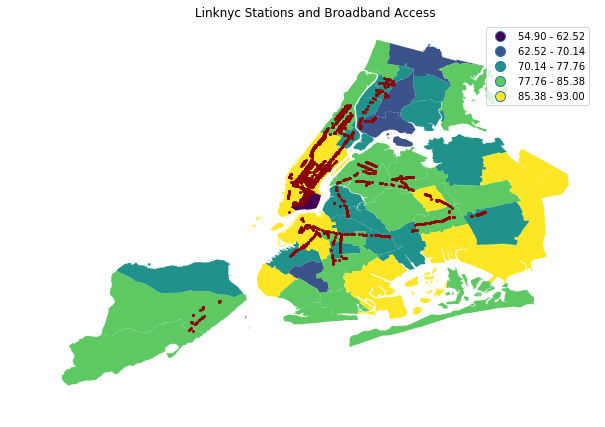

In [302]:
fig, ax = pl.subplots(figsize=(10,7))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#ax.set_aspect('equal')
#
pumashp.plot(ax=ax, column='Percent', figsize=(30), legend=True,  k = 5, scheme = 'Equal_interval').axis('off')
linkNYCgdf.plot(ax=ax, k = 5, figsize=(30), marker='o', markersize=4, color='darkred')
pl.title('Linknyc Stations and Broadband Access')

pl.show()

# 5 Find the number of linkNYC locations per person by PUMA

## 5.1 with the AFF API from ACS get the total population by puma and merge it into your GeoDF

In [313]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaPop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [314]:
pumaPop.head()

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
0  <html xmlns="http://www.w3.org/1999/xhtml" xml...                                                           
1                                           \t<head>                                                           
2               \t\t<title>Too Many Requests</title>                                                           
3                                          \t</head>                                                           
4                                           \t<body>

In [312]:
pumashp.head()

puma    shape_area     shape_leng  \
0  3701  9.792852e+07   53227.144461   
1  3702  1.889860e+08  106050.002302   
2  3703  2.670137e+08  304071.257466   
3  3704  1.062129e+08   47970.901277   
4  4015  8.105438e+07   50007.415493   

                                            geometry  Target Geo Id2  Percent  \
0  POLYGON ((-73.89641133483133 40.90450452082026...         3603701     84.3   
1  POLYGON ((-73.8442314689986 40.86942035096838,...         3603702     68.3   
2  (POLYGON ((-73.78833349834532 40.8346671297593...         3603703     82.8   
3  POLYGON ((-73.84792614069238 40.8713422330779,...         3603704     72.6   
4  POLYGON ((-73.95374853778468 40.63858633758547...         3604015     78.8   

  Margin of Error   gid  
0             2.6  3701  
1             3.7  3702  
2             3.2  3703  
3             3.6  3704  
4             2.9  4015

In [ ]:
linkpp = pumashp.merge(pumaPop, left_on = 'puma', right_on = 'public use microdata area')

In [ ]:
linkpp.head()

In [ ]:
linkpp.groupby(puma, )